# Groupal analysis notebook for Double T-maze task

Old data

## Import libraries

In [1]:
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import csv
import os

## Import data

In [2]:
allostatic_csv = '../data/old_data/data_self.csv'
control_csv = '../data/old_data/data.csv'

In [3]:
allostatic_data = pd.read_csv(allostatic_csv)

control_data = pd.read_csv(control_csv)

In [4]:
print('Number of columns in allostatic agent= ' + str(allostatic_data.shape[1]))
print('Number of rows in allostatic agent= ' + str(allostatic_data.shape[0]))
allostatic_data = allostatic_data[:2500]
allostatic_data

Number of columns in allostatic agent= 13
Number of rows in allostatic agent= 7544


,Xposition,Yposition,aVtemperature,aVthirst,aVfood,aVpredator,aVpeer,TFtemperature,TFthirst,TFfood,TFpredator,TFpeer,Grad_Temp
0,3.198957e-08,-0.009500,0.5855,0.7982,0.9982,0.303623,0.3991,-0.000000,0.298505,0.694357,-0.000000,1.000000,0.959250
1,3.198956e-08,-0.009500,0.6900,0.7960,0.9960,0.303623,0.3980,0.333641,0.104885,0.221012,0.009474,1.000000,0.958248
2,3.198956e-08,-0.009500,0.7850,0.7940,0.9940,0.303352,0.3970,0.199051,0.123732,0.139496,0.104200,1.000000,0.956152
3,3.198956e-08,-0.009500,0.8800,0.7920,0.9920,0.292920,0.3960,0.054454,0.187433,0.050279,0.188038,1.000000,0.953939
4,3.198942e-08,-0.009500,0.9845,0.7898,0.9898,0.271058,0.3949,0.190467,0.122962,0.256956,0.194939,1.000000,0.951609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,5.746576e-01,1.184653,1.0000,0.0000,0.9772,0.948791,0.8591,1.000000,-0.000000,0.141608,0.277492,-0.000000,0.914409
2496,5.746576e-01,1.184653,1.0000,0.0000,0.9752,0.944127,0.8581,1.000000,0.335861,0.216196,0.331123,0.077852,0.917813
2497,5.746576e-01,1.184653,1.0000,0.0000,0.9730,0.937295,0.8570,1.000000,0.139693,0.021284,0.059382,0.362576,0.921161
2498,5.504759e-01,1.163135,1.0000,0.0000,0.9710,0.923453,0.8560,1.000000,-0.000000,0.255557,0.102533,0.189916,0.924448


In [5]:
print('Number of columns in control agent= ' + str(control_data.shape[1]))
print('Number of rows in control agent= ' + str(control_data.shape[0]))
control_data = control_data[:2500]
control_data

Number of columns in control agent= 13
Number of rows in control agent= 7552


,Xposition,Yposition,aVtemperature,aVthirst,aVfood,aVpredator,aVpeer,TFtemperature,TFthirst,TFfood,TFpredator,TFpeer,Grad_Temp
0,3.199492e-08,-0.009502,0.5950,0.7980,0.9980,0.313571,0.3990,0.309342,0.090725,0.202881,0.124817,1.000000,0.959250
1,3.199459e-08,-0.009502,0.6995,0.7958,0.9958,0.313344,0.3979,0.487419,0.243318,0.667223,0.192368,1.000000,0.958248
2,3.199459e-08,-0.009502,0.8040,0.7936,0.9936,0.302947,0.3968,1.000000,0.106134,0.798760,0.156264,0.113668,0.956152
3,3.199459e-08,-0.009502,0.9085,0.7914,0.9914,0.289226,0.3957,0.719747,0.399707,1.000000,0.366698,0.506880,0.953939
4,3.199125e-08,-0.009501,1.0000,0.7892,0.9892,0.273494,0.3946,0.574373,-0.000000,1.000000,0.018955,0.229653,0.951609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2.602058e-03,0.415098,1.0000,0.8656,0.0000,0.646860,0.9405,0.172313,0.168508,1.000000,0.043999,0.197817,0.930819
2496,6.945132e-03,0.367580,1.0000,0.8636,0.0000,0.649680,0.9395,0.242491,0.225823,1.000000,0.268698,0.028584,0.933891
2497,6.945132e-03,0.367580,1.0000,0.8614,0.0000,0.645736,0.9384,0.064127,0.322048,1.000000,0.201425,0.172131,0.936881
2498,6.945132e-03,0.367580,1.0000,0.8592,0.0000,0.644462,0.9373,0.035571,-0.000000,1.000000,0.180941,0.198063,0.939782


In [6]:
allostatic_Xpose = allostatic_data['Xposition'].to_list()
allostatic_Ypose = allostatic_data['Yposition'].to_list()
allostatic_meanXpose = np.mean(allostatic_Xpose)
allostatic_meanYpose = np.mean(allostatic_Ypose)
allostatic_IS_temperature = allostatic_data['aVtemperature'].to_list()
allostatic_IS_hydration = allostatic_data['aVthirst'].to_list()
allostatic_IS_energy = allostatic_data['aVfood'].to_list()
allostatic_IS_security = allostatic_data['aVpredator'].to_list()
allostatic_IS_mating = allostatic_data['aVpeer'].to_list()
allostatic_gradient_temp = allostatic_data['Grad_Temp'].to_list()

In [7]:
control_Xpose = control_data['Xposition'].to_list()
control_Ypose = control_data['Yposition'].to_list()
control_meanXpose = np.mean(control_Xpose)
control_meanYpose = np.mean(control_Ypose)
control_IS_temperature = control_data['aVtemperature'].to_list()
control_IS_hydration = control_data['aVthirst'].to_list()
control_IS_energy = control_data['aVfood'].to_list()
control_IS_security = control_data['aVpredator'].to_list()
control_IS_mating = control_data['aVpeer'].to_list()
control_gradient_temp = control_data['Grad_Temp'].to_list()

In [8]:
# CORRECTING SECURITY VALUES
allostatic_IS_security = [1 - element for element in allostatic_IS_security]
control_IS_security = [1 - element for element in control_IS_security]

### Allostatic agent trajectory

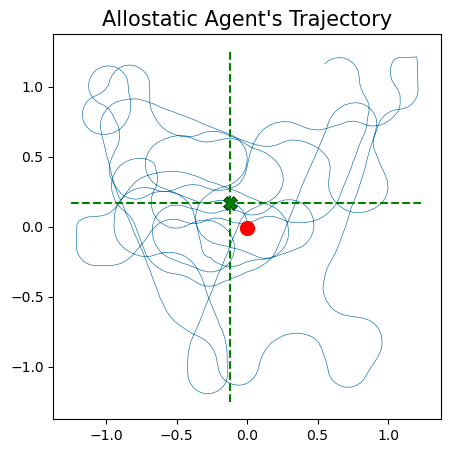

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.plot(allostatic_Xpose, allostatic_Ypose, linewidth=0.5)

plt.title("Allostatic Agent's Trajectory", fontsize=15)
plt.plot(allostatic_Xpose[0],allostatic_Ypose[0],'ro', markersize=10)
plt.plot(allostatic_meanXpose,allostatic_meanYpose,'Xg', markersize=10, markeredgecolor='black', markeredgewidth=0.5)
plt.plot([allostatic_meanXpose, allostatic_meanXpose], [-1.25, 1.25], color='green', linestyle='dashed', linewidth=1.5)
plt.plot([-1.25, 1.25], [allostatic_meanYpose, allostatic_meanYpose], color='green', linestyle='dashed', linewidth=1.5)
plt.show()

### Control agent trajectory

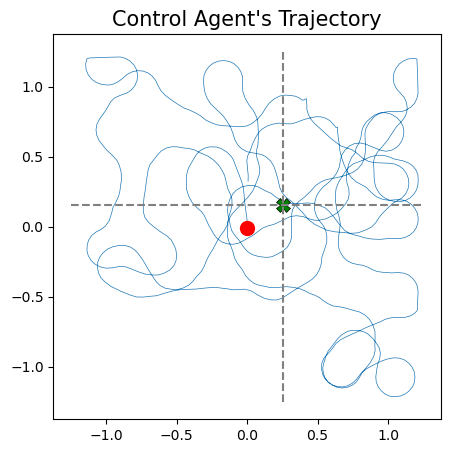

In [10]:
fig = plt.figure(figsize=(5, 5))
plt.plot(control_Xpose, control_Ypose, linewidth=0.5)

plt.title("Control Agent's Trajectory", fontsize=15)
plt.plot(control_Xpose[0],control_Ypose[0],'ro', markersize=10)
plt.plot(control_meanXpose,control_meanYpose,'Xg', markersize=10, markeredgecolor='black', markeredgewidth=0.5)
plt.plot([control_meanXpose, control_meanXpose], [-1.25, 1.25], color='gray', linestyle='dashed', linewidth=1.5)
plt.plot([-1.25, 1.25], [control_meanYpose, control_meanYpose], color='gray', linestyle='dashed', linewidth=1.5)
plt.show()

### Allostatic agent occupancy map

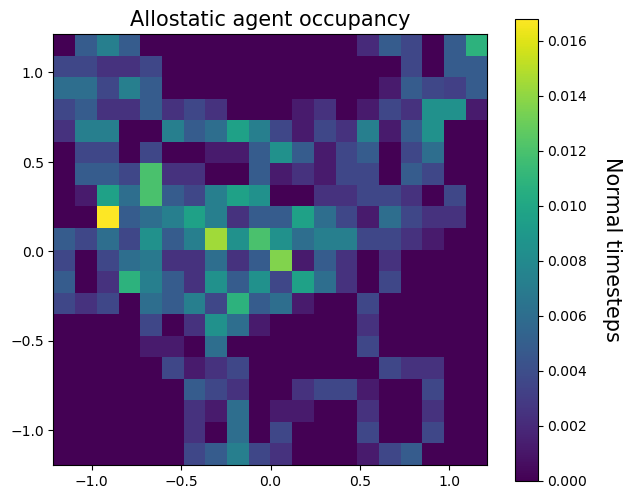

In [11]:
Xpose = allostatic_Xpose
Ypose = allostatic_Ypose


xy_array = np.column_stack((Xpose, Ypose))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 20
xedges= []
yedges= []

xedges = np.linspace(min(Xpose), max(Xpose), bins + 1)
yedges = np.linspace(min(Ypose), max(Ypose), bins + 1)


fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges))
H = hist.T
H_normalized = H/float(xy_array.shape[0])      
        
ax.set_title("Allostatic agent occupancy", fontsize=15)

hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar = fig.colorbar(hist)
cbar.set_label('Normal timesteps', rotation=270, fontsize=15, labelpad=+25)

plt.show()

### Control agent occupancy map

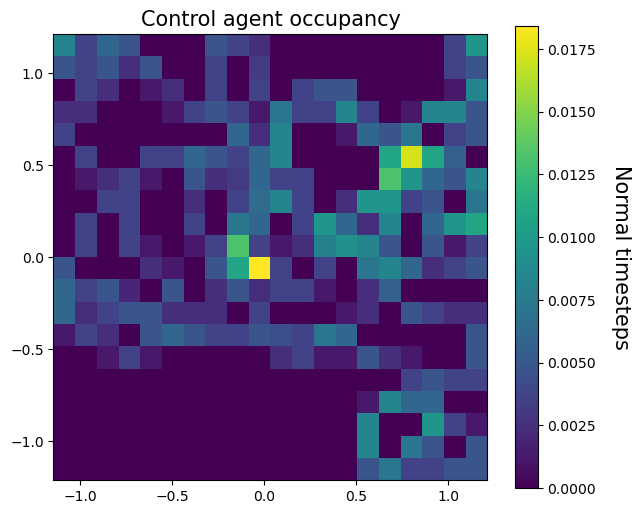

In [12]:
Xpose = control_Xpose
Ypose = control_Ypose


xy_array = np.column_stack((Xpose, Ypose))
x_array = xy_array[:,0]
y_array = xy_array[:,1]

bins = 20
xedges= []
yedges= []

xedges = np.linspace(min(Xpose), max(Xpose), bins + 1)
yedges = np.linspace(min(Ypose), max(Ypose), bins + 1)


fig, ax = plt.subplots(figsize=(7, 6))
ax.set_aspect("equal")
hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges))
H = hist.T
H_normalized = H/float(xy_array.shape[0])      
        
ax.set_title("Control agent occupancy", fontsize=15)

hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar = fig.colorbar(hist)
cbar.set_label('Normal timesteps', rotation=270, fontsize=15, labelpad=+25)

plt.show()

### Internal state analysis

In [13]:
allostatic_means_IS_temperature = np.mean(allostatic_IS_temperature)
allostatic_means_IS_hydration = np.mean(allostatic_IS_hydration)
allostatic_means_IS_energy = np.mean(allostatic_IS_energy)
allostatic_means_IS_security = np.mean(allostatic_IS_security)
allostatic_means_IS_mating = np.mean(allostatic_IS_mating)

control_means_IS_temperature = np.mean(control_IS_temperature)
control_means_IS_hydration = np.mean(control_IS_hydration)
control_means_IS_energy = np.mean(control_IS_energy)
control_means_IS_security = np.mean(control_IS_security)
control_means_IS_mating = np.mean(control_IS_mating)

In [14]:
allostatic_mean_ISs = [np.mean(allostatic_means_IS_temperature), np.mean(allostatic_means_IS_hydration), np.mean(allostatic_means_IS_energy), np.mean(allostatic_means_IS_security), np.mean(allostatic_means_IS_mating)]
control_mean_ISs = [np.mean(control_means_IS_temperature), np.mean(control_means_IS_hydration), np.mean(control_means_IS_energy), np.mean(control_means_IS_security), np.mean(control_means_IS_mating)]

allostatic_std_ISs = [np.std(allostatic_means_IS_temperature), np.std(allostatic_means_IS_hydration), np.std(allostatic_means_IS_energy), np.std(allostatic_means_IS_security), np.std(allostatic_means_IS_mating)]
control_std_ISs = [np.std(control_means_IS_temperature), np.std(control_means_IS_hydration), np.std(control_means_IS_energy), np.std(control_means_IS_security), np.std(control_means_IS_mating)]

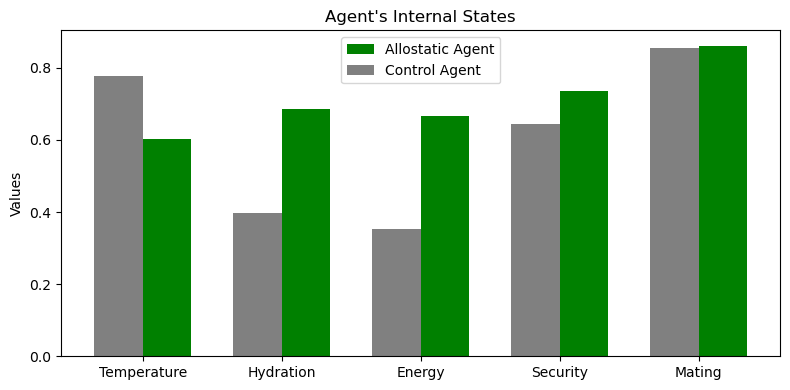

In [17]:
labels = ['Temperature', 'Hydration', 'Energy', 'Security', 'Mating']  # x-axis labels

x = np.arange(len(labels))  # positions for labels
width = 0.35  # width of each bar

# Create plot
fig, ax = plt.subplots(figsize=(8, 4))
bars1 = ax.bar(x + width/2, allostatic_mean_ISs, width, label='Allostatic Agent', color='green', capsize=5)
bars2 = ax.bar(x - width/2, control_mean_ISs, width, label='Control Agent', color='gray', capsize=5)

# Add labels and title
ax.set_ylabel('Values')
ax.set_title("Agent's Internal States")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

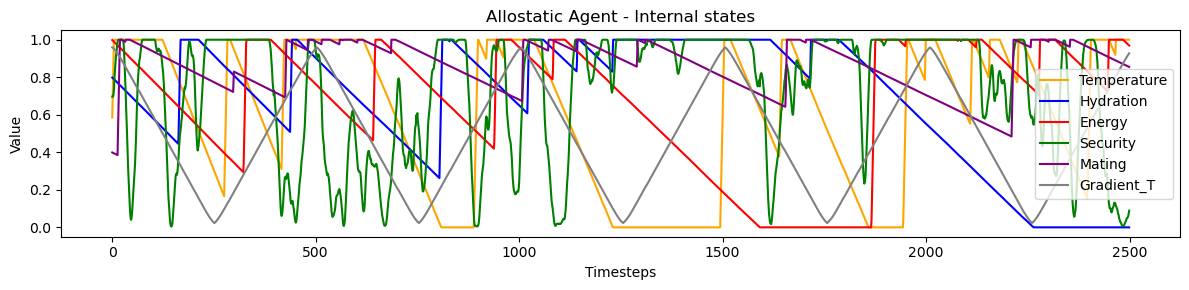

In [103]:
trial = 0
x = np.arange(len(allostatic_IS_temperature))

plt.figure(figsize=(12, 3))
plt.plot(x, allostatic_IS_temperature, label='Temperature', color= 'Orange')
plt.plot(x, allostatic_IS_hydration, label='Hydration', color= 'Blue')
plt.plot(x, allostatic_IS_energy, label='Energy', color= 'Red')
plt.plot(x, allostatic_IS_security, label='Security', color= 'Green')
plt.plot(x, allostatic_IS_mating, label='Mating', color= 'Purple')
plt.plot(x, allostatic_gradient_temp, label='Gradient_T', color= 'Gray')

# Labels and legend
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.title('Allostatic Agent - Internal states')
plt.legend()
plt.tight_layout()
plt.show()

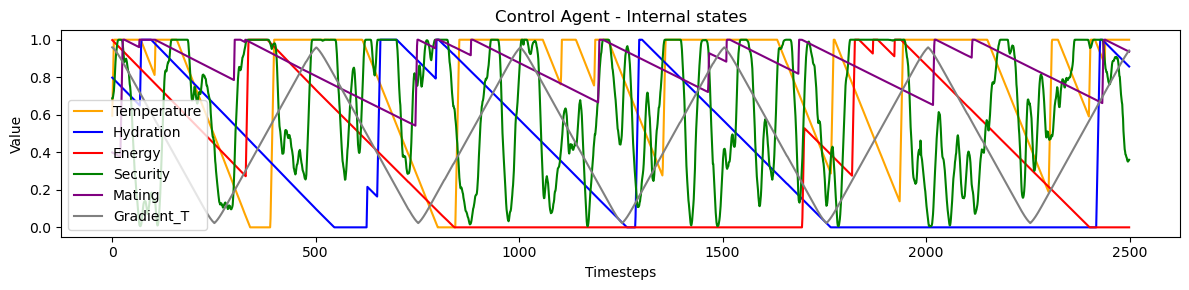

In [104]:
trial = 0
x = np.arange(len(control_IS_temperature))

plt.figure(figsize=(12, 3))
plt.plot(x, control_IS_temperature, label='Temperature', color= 'Orange')
plt.plot(x, control_IS_hydration, label='Hydration', color= 'Blue')
plt.plot(x, control_IS_energy, label='Energy', color= 'Red')
plt.plot(x, control_IS_security, label='Security', color= 'Green')
plt.plot(x, control_IS_mating, label='Mating', color= 'Purple')
plt.plot(x, control_gradient_temp, label='Gradient_T', color= 'Gray')

# Labels and legend
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.title('Control Agent - Internal states')
plt.legend()
plt.tight_layout()
plt.show()

### Exploring correlations between internal states and environmental temperature
#### Within trials

In [21]:
max_gradient_temp = np.max(allostatic_gradient_temp)
min_gradient_temp = np.min(allostatic_gradient_temp)
n_clusters = int(round((max_gradient_temp - min_gradient_temp), 2) *100)

In [22]:
print("max_gradient_temp = ", max_gradient_temp)
print("min_gradient_temp = ", min_gradient_temp)
print("n_clusters = ", n_clusters)

max_gradient_temp =  0.959250345628544
min_gradient_temp =  0.0226183641046583
n_clusters =  94


In [23]:
cluster_thresholds = [] 
low_treshold = min_gradient_temp

for i in range(n_clusters):
    low_treshold += 0.01
    cluster_thresholds.append(low_treshold)

In [24]:
cluster_thresholds = [0] + cluster_thresholds
print("cluster_thresholds = ", cluster_thresholds)

cluster_thresholds =  [0, 0.0326183641046583, 0.0426183641046583, 0.052618364104658304, 0.0626183641046583, 0.0726183641046583, 0.0826183641046583, 0.09261836410465829, 0.10261836410465829, 0.11261836410465828, 0.12261836410465828, 0.13261836410465827, 0.14261836410465828, 0.1526183641046583, 0.1626183641046583, 0.1726183641046583, 0.18261836410465832, 0.19261836410465832, 0.20261836410465833, 0.21261836410465834, 0.22261836410465835, 0.23261836410465836, 0.24261836410465837, 0.2526183641046584, 0.2626183641046584, 0.2726183641046584, 0.2826183641046584, 0.2926183641046584, 0.3026183641046584, 0.31261836410465843, 0.32261836410465844, 0.33261836410465845, 0.34261836410465846, 0.35261836410465847, 0.3626183641046585, 0.3726183641046585, 0.3826183641046585, 0.3926183641046585, 0.4026183641046585, 0.4126183641046585, 0.42261836410465853, 0.43261836410465854, 0.44261836410465855, 0.45261836410465855, 0.46261836410465856, 0.4726183641046586, 0.4826183641046586, 0.4926183641046586, 0.5026183

In [44]:
allostatic_temperature_trial_cluster = []
allostatic_energy_trial_cluster = []
allostatic_hydration_trial_cluster = []
allostatic_security_trial_cluster = []
allostatic_mating_trial_cluster = []

for i in range(n_clusters):
    temperature_cluster = []
    energy_cluster = []
    hydration_cluster = []
    security_cluster = []
    mating_cluster = []
    for j in range(len(allostatic_IS_temperature)):
        if allostatic_gradient_temp[j] >= cluster_thresholds[i] and allostatic_gradient_temp[j] < cluster_thresholds[i+1]:
            temperature_cluster.append(allostatic_IS_temperature[j])
            energy_cluster.append(allostatic_IS_energy[j])
            hydration_cluster.append(allostatic_IS_hydration[j])
            security_cluster.append(allostatic_IS_security[j])
            mating_cluster.append(allostatic_IS_mating[j])
            
    allostatic_temperature_trial_cluster.append(np.mean(temperature_cluster))
    allostatic_energy_trial_cluster.append(np.mean(energy_cluster))
    allostatic_hydration_trial_cluster.append(np.mean(hydration_cluster))
    allostatic_security_trial_cluster.append(np.mean(security_cluster))
    allostatic_mating_trial_cluster.append(np.mean(mating_cluster))

In [45]:
control_temperature_trial_cluster = []
control_energy_trial_cluster = []
control_hydration_trial_cluster = []
control_security_trial_cluster = []
control_mating_trial_cluster = []

for i in range(n_clusters):
    temperature_cluster = []
    energy_cluster = []
    hydration_cluster = []
    security_cluster = []
    mating_cluster = []
    for j in range(len(control_IS_temperature)):
        if control_gradient_temp[j] >= cluster_thresholds[i] and control_gradient_temp[j] < cluster_thresholds[i+1]:
            temperature_cluster.append(control_IS_temperature[j])
            energy_cluster.append(control_IS_energy[j])
            hydration_cluster.append(control_IS_hydration[j])
            security_cluster.append(control_IS_security[j])
            mating_cluster.append(control_IS_mating[j])
            
    control_temperature_trial_cluster.append(np.mean(temperature_cluster))
    control_energy_trial_cluster.append(np.mean(energy_cluster))
    control_hydration_trial_cluster.append(np.mean(hydration_cluster))
    control_security_trial_cluster.append(np.mean(security_cluster))
    control_mating_trial_cluster.append(np.mean(mating_cluster))

In [47]:
def plot_within_trial_correlation(allostatic_mean_cluster, control_mean_cluster, cluster_thresholds, internal_state, color):
    x0 = allostatic_mean_cluster
    x1 = control_mean_cluster
    y = cluster_thresholds[1:]
    
    plt.figure(figsize=(5, 4))
    plt.scatter(x0, y, color=color, label='Allostatic Agent', alpha=0.4)
    plt.scatter(x1, y, color='gray', label='Control Agent', alpha=0.4)
    
    r0, p0 = pearsonr(x0, y)
    slope0, intercept0, *_ = linregress(x0, y)
    line0 = slope0 * np.array(x0) + intercept0
    
    r1, p1 = pearsonr(x1, y)
    slope1, intercept1, *_ = linregress(x1, y)
    line1 = slope1 * np.array(x1) + intercept1
    
    plt.plot(x1, line1, color='gray', linestyle='-', label=f'Fit (r = {r1:.3f})')
    plt.plot(x0, line0, color=color, linestyle='-', label=f'Fit (r = {r0:.3f})')
    
    plt.xlabel('Agent ' + internal_state)
    plt.ylabel('Env. Temperature')
    plt.ylim(0, 1)
    plt.title('Agent ' + internal_state + ' vs. Env. Temperature', fontsize=15)
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

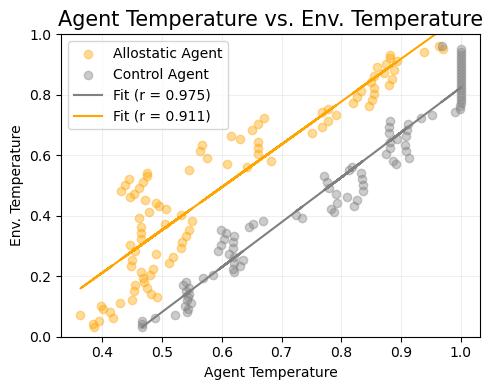

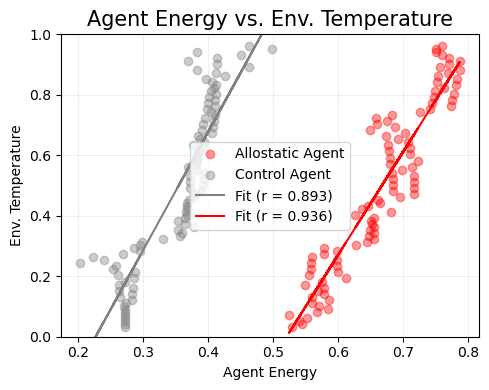

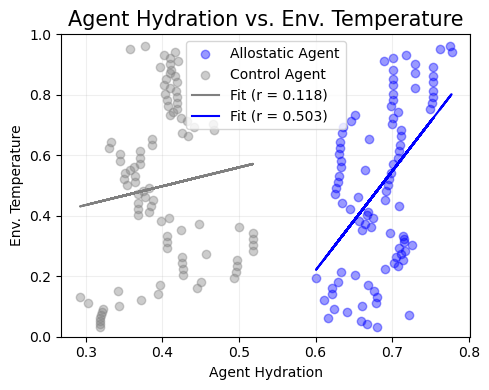

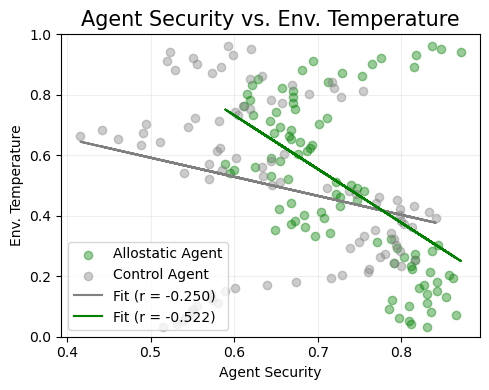

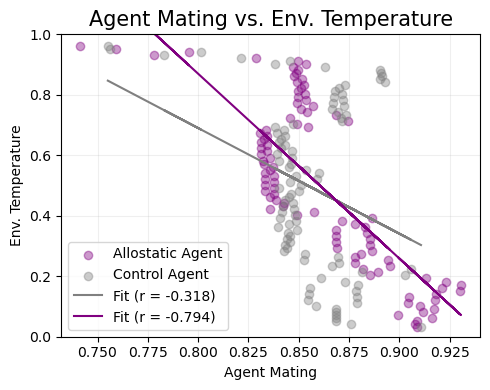

In [48]:
plot_within_trial_correlation(allostatic_temperature_trial_cluster, control_temperature_trial_cluster, cluster_thresholds, 'Temperature', 'orange')
plot_within_trial_correlation(allostatic_energy_trial_cluster, control_energy_trial_cluster, cluster_thresholds, 'Energy', 'red')
plot_within_trial_correlation(allostatic_hydration_trial_cluster, control_hydration_trial_cluster, cluster_thresholds, 'Hydration', 'blue')
plot_within_trial_correlation(allostatic_security_trial_cluster, control_security_trial_cluster, cluster_thresholds, 'Security', 'green')
plot_within_trial_correlation(allostatic_mating_trial_cluster, control_mating_trial_cluster, cluster_thresholds, 'Mating', 'purple')

In [49]:
allostatic_trial_efficienty = []
for i in range(len(allostatic_temperature_trial_cluster)):
    allostatic_trial_efficienty.append((allostatic_temperature_trial_cluster[i] + allostatic_energy_trial_cluster[i] + allostatic_hydration_trial_cluster[i] + allostatic_security_trial_cluster[i] + allostatic_mating_trial_cluster[i]) / 5)

allostatic_trial_fairness = []
for i in range(len(allostatic_temperature_trial_cluster)):
    max_IS = max([allostatic_temperature_trial_cluster[i], allostatic_energy_trial_cluster[i], allostatic_hydration_trial_cluster[i], allostatic_security_trial_cluster[i], allostatic_mating_trial_cluster[i]])
    min_IS = min([allostatic_temperature_trial_cluster[i], allostatic_energy_trial_cluster[i], allostatic_hydration_trial_cluster[i], allostatic_security_trial_cluster[i], allostatic_mating_trial_cluster[i]])
    allostatic_trial_fairness.append(1 - (max_IS - min_IS))

allostatic_trial_stability = []
dV = 1.0
for i in range(len(allostatic_temperature_trial_cluster)):
    full_state = [allostatic_temperature_trial_cluster[i], allostatic_energy_trial_cluster[i], allostatic_hydration_trial_cluster[i], allostatic_security_trial_cluster[i], allostatic_mating_trial_cluster[i]]
    squared_errors = (np.array(full_state) - dV) ** 2
    total_squared_error = np.sum(squared_errors)
    stability = 1 - (total_squared_error / 5)
    allostatic_trial_stability.append(stability)

In [50]:
control_trial_efficienty = []
for i in range(len(control_temperature_trial_cluster)):
    control_trial_efficienty.append((control_temperature_trial_cluster[i] + control_energy_trial_cluster[i] + control_hydration_trial_cluster[i] + control_security_trial_cluster[i] + control_mating_trial_cluster[i]) / 5)

control_trial_fairness = []
for i in range(len(control_temperature_trial_cluster)):
    max_IS = max([control_temperature_trial_cluster[i], control_energy_trial_cluster[i], control_hydration_trial_cluster[i], control_security_trial_cluster[i], control_mating_trial_cluster[i]])
    min_IS = min([control_temperature_trial_cluster[i], control_energy_trial_cluster[i], control_hydration_trial_cluster[i], control_security_trial_cluster[i], control_mating_trial_cluster[i]])
    control_trial_fairness.append(1 - (max_IS - min_IS))

control_trial_stability = []
dV = 1.0
for i in range(len(control_temperature_trial_cluster)):
    full_state = [control_temperature_trial_cluster[i], control_energy_trial_cluster[i], control_hydration_trial_cluster[i], control_security_trial_cluster[i], control_mating_trial_cluster[i]]
    squared_errors = (np.array(full_state) - dV) ** 2
    total_squared_error = np.sum(squared_errors)
    stability = 1 - (total_squared_error / 5)
    control_trial_stability.append(stability)

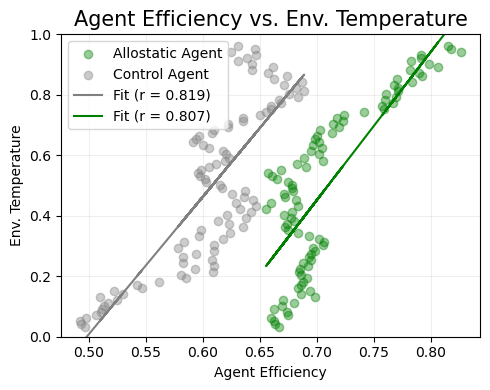

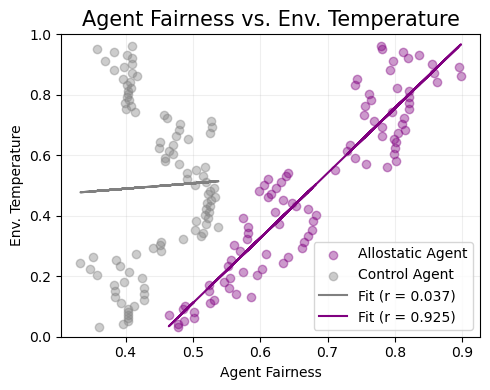

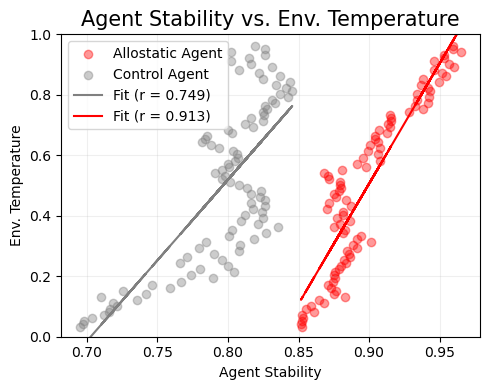

In [52]:
plot_within_trial_correlation(allostatic_trial_efficienty, control_trial_efficienty, cluster_thresholds, 'Efficiency', 'green')
plot_within_trial_correlation(allostatic_trial_fairness, control_trial_fairness, cluster_thresholds, 'Fairness', 'purple')
plot_within_trial_correlation(allostatic_trial_stability, control_trial_stability, cluster_thresholds, 'Stability', 'red')

### Exploring correlations between internal states and environmental temperature
#### Across trials (averaging)

In [102]:
exp_allostatic_gradient_temp = np.concatenate(allostatic_gradient_temp)
exp_allostatic_IS_temperature = np.concatenate(allostatic_IS_temperature)
exp_allostatic_IS_hydration = np.concatenate(allostatic_IS_hydration)
exp_allostatic_IS_energy = np.concatenate(allostatic_IS_energy)
exp_allostatic_IS_security = np.concatenate(allostatic_IS_security)
exp_allostatic_IS_mating = np.concatenate(allostatic_IS_mating)

exp_control_gradient_temp = np.concatenate(control_gradient_temp)
exp_control_IS_temperature = np.concatenate(control_IS_temperature)
exp_control_IS_hydration = np.concatenate(control_IS_hydration)
exp_control_IS_energy = np.concatenate(control_IS_energy)
exp_control_IS_security = np.concatenate(control_IS_security)
exp_control_IS_mating = np.concatenate(control_IS_mating)

In [103]:
low_th = 0
allostatic_clustered_temperature = []
allostatic_clustered_hydration = []
allostatic_clustered_energy = []
allostatic_clustered_security = []
allostatic_clustered_mating = []

for b in range(len(cluster_thresholds)):
    up_th = cluster_thresholds[b]
    
    bin_temperature = [value for i, value in enumerate(exp_allostatic_IS_temperature) if exp_allostatic_gradient_temp[i] > low_th and exp_allostatic_gradient_temp[i] <= up_th]
    bin_hydration = [value for i, value in enumerate(exp_allostatic_IS_hydration) if exp_allostatic_gradient_temp[i] > low_th and exp_allostatic_gradient_temp[i] <= up_th]
    bin_energy = [value for i, value in enumerate(exp_allostatic_IS_energy) if exp_allostatic_gradient_temp[i] > low_th and exp_allostatic_gradient_temp[i] <= up_th]
    bin_security = [value for i, value in enumerate(exp_allostatic_IS_security) if exp_allostatic_gradient_temp[i] > low_th and exp_allostatic_gradient_temp[i] <= up_th]
    bin_mating = [value for i, value in enumerate(exp_allostatic_IS_mating) if exp_allostatic_gradient_temp[i] > low_th and exp_allostatic_gradient_temp[i] <= up_th]
    
    allostatic_clustered_temperature.append(bin_temperature)
    allostatic_clustered_hydration.append(bin_hydration)
    allostatic_clustered_energy.append(bin_energy)
    allostatic_clustered_security.append(bin_security)
    allostatic_clustered_mating.append(bin_mating)
    low_th = up_th

In [104]:
low_th = 0
control_clustered_temperature = []
control_clustered_hydration = []
control_clustered_energy = []
control_clustered_security = []
control_clustered_mating = []

for b in range(len(cluster_thresholds)):
    up_th = cluster_thresholds[b]
    
    bin_temperature = [value for i, value in enumerate(exp_control_IS_temperature) if exp_control_gradient_temp[i] > low_th and exp_control_gradient_temp[i] <= up_th]
    bin_hydration = [value for i, value in enumerate(exp_control_IS_hydration) if exp_control_gradient_temp[i] > low_th and exp_control_gradient_temp[i] <= up_th]
    bin_energy = [value for i, value in enumerate(exp_control_IS_energy) if exp_control_gradient_temp[i] > low_th and exp_control_gradient_temp[i] <= up_th]
    bin_security = [value for i, value in enumerate(exp_control_IS_security) if exp_control_gradient_temp[i] > low_th and exp_control_gradient_temp[i] <= up_th]
    bin_mating = [value for i, value in enumerate(exp_control_IS_mating) if exp_control_gradient_temp[i] > low_th and exp_control_gradient_temp[i] <= up_th]
    
    control_clustered_temperature.append(bin_temperature)
    control_clustered_hydration.append(bin_hydration)
    control_clustered_energy.append(bin_energy)
    control_clustered_security.append(bin_security)
    control_clustered_mating.append(bin_mating)
    low_th = up_th

In [105]:
allostatic_mean_cluster_temperature = []
allostatic_mean_cluster_hydration = []
allostatic_mean_cluster_energy = []
allostatic_mean_cluster_security = []
allostatic_mean_cluster_mating = []

for i in range(len(allostatic_clustered_temperature)):
    allostatic_mean_cluster_temperature.append(np.mean(allostatic_clustered_temperature[i]))
    allostatic_mean_cluster_hydration.append(np.mean(allostatic_clustered_hydration[i]))
    allostatic_mean_cluster_energy.append(np.mean(allostatic_clustered_energy[i]))
    allostatic_mean_cluster_security.append(np.mean(allostatic_clustered_security[i]))
    allostatic_mean_cluster_mating.append(np.mean(allostatic_clustered_mating[i]))

In [106]:
control_mean_cluster_temperature = []
control_mean_cluster_hydration = []
control_mean_cluster_energy = []
control_mean_cluster_security = []
control_mean_cluster_mating = []

for i in range(len(control_clustered_temperature)):
    control_mean_cluster_temperature.append(np.mean(control_clustered_temperature[i]))
    control_mean_cluster_hydration.append(np.mean(control_clustered_hydration[i]))
    control_mean_cluster_energy.append(np.mean(control_clustered_energy[i]))
    control_mean_cluster_security.append(np.mean(control_clustered_security[i]))
    control_mean_cluster_mating.append(np.mean(control_clustered_mating[i]))

In [107]:
def plot_across_trial_correlation(allostatic_mean_cluster, control_mean_cluster, cluster_thresholds, internal_state, color):
    x0 = allostatic_mean_cluster
    x1 = control_mean_cluster
    y = cluster_thresholds
    
    plt.figure(figsize=(5, 4))
    plt.scatter(x0, y, color=color, label='Allostatic Agent', alpha=0.7)
    plt.scatter(x1, y, color='gray', label='Control Agent', alpha=0.7)
    
    r0, p0 = pearsonr(x0, y)
    slope0, intercept0, *_ = linregress(x0, y)
    line0 = slope0 * np.array(x0) + intercept0
    
    r1, p1 = pearsonr(x1, y)
    slope1, intercept1, *_ = linregress(x1, y)
    line1 = slope1 * np.array(x1) + intercept1
    
    plt.plot(x0, line0, color=color, linestyle='-', label=f'Fit (r = {r0:.3f})')
    plt.plot(x1, line1, color='gray', linestyle='-', label=f'Fit (r = {r1:.3f})')
    
    plt.xlabel('Agent ' + internal_state)
    plt.ylabel('Env. Temperature')
    plt.ylim(0, 1)
    plt.title('Agent ' + internal_state + ' vs. Env. Temperature', fontsize=15)
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.tight_layout()
    plt.show()

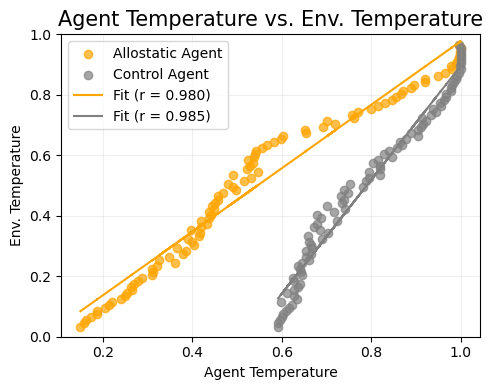

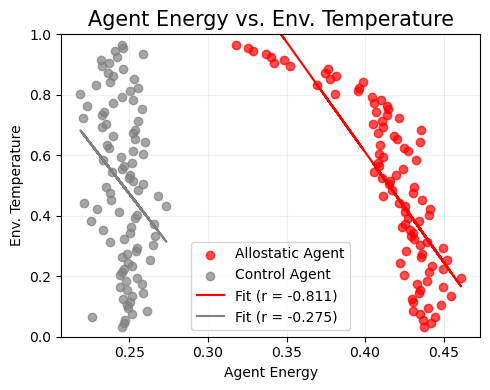

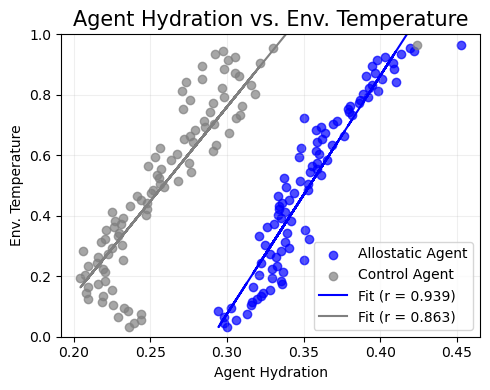

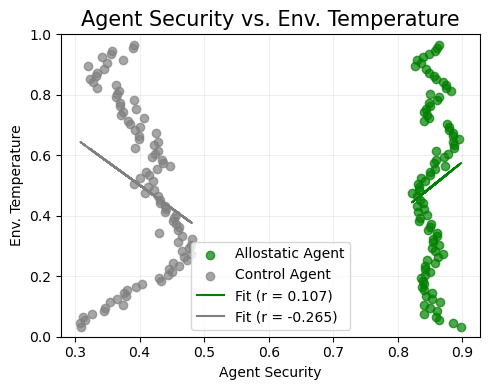

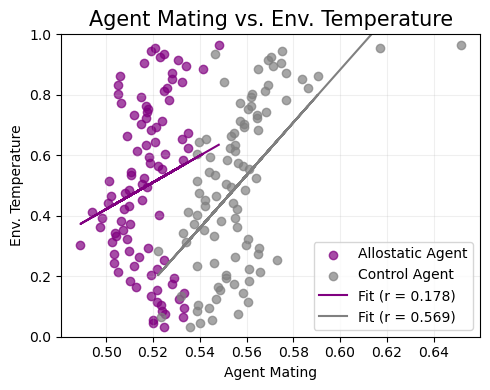

In [108]:
plot_across_trial_correlation(allostatic_mean_cluster_temperature, control_mean_cluster_temperature, cluster_thresholds, 'Temperature', 'orange')
plot_across_trial_correlation(allostatic_mean_cluster_energy, control_mean_cluster_energy, cluster_thresholds, 'Energy', 'red')
plot_across_trial_correlation(allostatic_mean_cluster_hydration, control_mean_cluster_hydration, cluster_thresholds, 'Hydration', 'blue')
plot_across_trial_correlation(allostatic_mean_cluster_security, control_mean_cluster_security, cluster_thresholds, 'Security', 'green')
plot_across_trial_correlation(allostatic_mean_cluster_mating, control_mean_cluster_mating, cluster_thresholds, 'Mating', 'purple')

In [109]:
allostatic_efficiency_cluster = []
for i in range(len(allostatic_clustered_temperature)):
    t = np.mean(allostatic_clustered_temperature[i])
    h = np.mean(allostatic_clustered_hydration[i])
    e = np.mean(allostatic_clustered_energy[i])
    s = np.mean(allostatic_clustered_security[i])
    m = np.mean(allostatic_clustered_mating[i])
    
    allostatic_efficiency_cluster.append((t + h + e + s + m) / 5)

control_efficiency_cluster = []
for i in range(len(control_clustered_temperature)):
    t = np.mean(control_clustered_temperature[i])
    h = np.mean(control_clustered_hydration[i])
    e = np.mean(control_clustered_energy[i])
    s = np.mean(control_clustered_security[i])
    m = np.mean(control_clustered_mating[i])
    
    control_efficiency_cluster.append((t + h + e + s + m) / 5)

In [110]:
allostatic_fairness_cluster = []
for cluster in range(len(allostatic_clustered_temperature)):
    cluster_fairness = []
    for i in range(len(allostatic_clustered_temperature[cluster])):
        max_IS = max([allostatic_clustered_temperature[cluster][i], allostatic_clustered_energy[cluster][i], allostatic_clustered_hydration[cluster][i], allostatic_clustered_security[cluster][i], allostatic_clustered_mating[cluster][i]])
        min_IS = min([allostatic_clustered_temperature[cluster][i], allostatic_clustered_energy[cluster][i], allostatic_clustered_hydration[cluster][i], allostatic_clustered_security[cluster][i], allostatic_clustered_mating[cluster][i]])
        trial_fairness = 1 - (max_IS - min_IS)
        cluster_fairness.append(trial_fairness)
    allostatic_fairness_cluster.append(np.mean(cluster_fairness))


control_fairness_cluster = []
for cluster in range(len(control_clustered_temperature)):
    cluster_fairness = []
    for i in range(len(control_clustered_temperature[cluster])):
        max_IS = max([control_clustered_temperature[cluster][i], control_clustered_energy[cluster][i], control_clustered_hydration[cluster][i], control_clustered_security[cluster][i], control_clustered_mating[cluster][i]])
        min_IS = min([control_clustered_temperature[cluster][i], control_clustered_energy[cluster][i], control_clustered_hydration[cluster][i], control_clustered_security[cluster][i], control_clustered_mating[cluster][i]])
        trial_fairness = 1 - (max_IS - min_IS)
        cluster_fairness.append(trial_fairness)
    control_fairness_cluster.append(np.mean(cluster_fairness))

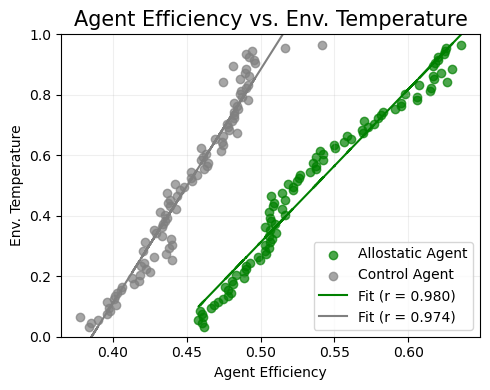

In [111]:
plot_across_trial_correlation(allostatic_efficiency_cluster, control_efficiency_cluster, cluster_thresholds, 'Efficiency', 'green')

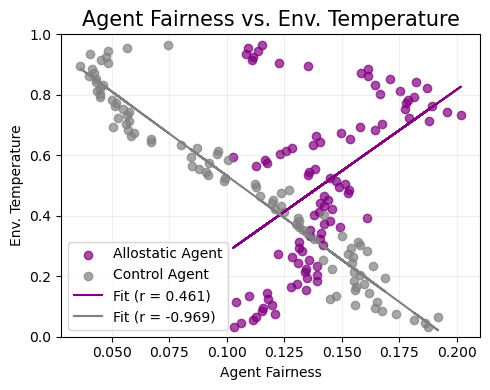

In [112]:
plot_across_trial_correlation(allostatic_fairness_cluster, control_fairness_cluster, cluster_thresholds, 'Fairness', 'purple')

## TO DO

-  Analysis of critical security riks
-  Analysis of security and other internal states.